<a href="https://colab.research.google.com/github/kuakeke/113-2programming/blob/main/2025%E5%B9%B45%E6%9C%881%E6%97%A5%20%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80%20%E4%BD%9C%E6%A5%AD%E4%BA%94%20%E5%91%BD%E5%90%8D%E5%AF%A6%E9%AB%94%E8%AD%98%E5%88%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

柯昱葶 國文115級 41120122L
程式語言 作業五 命名實體識別

# 作業目標
透過命名實體識別（NER, Named Entity Recognition）中的斷字（Tokenization）練習，讓你能夠：

* 自選感興趣的文本作為任務素材
* 實際操作斷字與NER
* 思考資料與模型應用的可能性與限制

# 作業內容

1. 資料替換:
 * 請自選一段你有興趣的中文文本（例如：食譜、小說片段、新聞、歌詞、社群貼文等），長度至少150字。
 * 將課堂提供的NER範例資料替換成你自己的文本。。

2. 斷字與NER處理：
 * 使用你熟悉的工具（如 jieba、ckiptagger、stanza 等）進行中文斷詞與實體識別。
 * 清楚展示處理結果（如使用程式碼、表格或截圖方式呈現）。

3. 說明與反思：
 * 說明你為什麼選擇這段資料、這段資料在斷字或NER上的挑戰、你從中學到了什麼等。
 * 可以額外探討這份資料在實務應用上的潛力，例如：「如果把它做成某個專案，它可能會…」

# 評分標準（總分：100分）
* 評分項目	說明	分數
 * 資料選擇與替換	自選文本具代表性，主題明確、有意義	20分
 * 斷字與NER成果	有實際執行斷詞與NER，結果清晰呈現	40分
 * 斷字分析圖表	成果有製作相關圖表（如詞頻、NER分布等）	30分
 * 說明與反思	有說明選材原因與處理挑戰、反思具邏輯	10分
 * 請正確提交	成果應統一提交至 GitHub 並寫於 README.md 中，未收到作業不予計分	必須遵守






---



**作業發想：我打算製作一個可以分析中文段落句子成分的工具，以方便想學習中文的外國人，或是教學中文的老師能使用，將段落進行詞性分析。**

教材小故事
https://docs.google.com/spreadsheets/d/1vmGkbxa5JUCYOmuTQJ8LWhnFlVKby3TQl7bi2dmPuGo/edit?usp=sharing

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vmGkbxa5JUCYOmuTQJ8LWhnFlVKby3TQl7bi2dmPuGo/edit?usp=sharing').sheet1

In [3]:
dicts = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vmGkbxa5JUCYOmuTQJ8LWhnFlVKby3TQl7bi2dmPuGo/edit?usp=sharing').get_worksheet(0)
dicts = dicts.get_all_records()
dicts = pd.DataFrame(dicts)

In [4]:
# 讀取所有數據
rows = gsheets.get_all_records()
import pandas as pd
df = pd.DataFrame(rows)

**我用stanza進行中文斷詞與實體識別：**

In [5]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 36.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [6]:
import stanza

In [7]:
stanza.download('zh')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:"zh" is an alias for "zh-hans"
INFO:stanza:Downloading default packages for language: zh-hans (Simplified_Chinese) ...


INFO:stanza:Downloaded file to /root/stanza_resources/zh-hans/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [8]:
nlp = stanza.Pipeline('zh')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:"zh" is an alias for "zh-hans"
INFO:stanza:Loading these models for language: zh-hans (Simplified_Chinese):
| Processor    | Package          |
-----------------------------------
| tokenize     | gsdsimp          |
| pos          | gsdsimp_charlm   |
| lemma        | gsdsimp_nocharlm |
| constituency | ctb-51_charlm    |
| depparse     | gsdsimp_charlm   |
| sentiment    | ren_charlm       |
| ner          | ontonotes        |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [9]:
# 把所有內容欄位的文字合併成一整段
text = ' '.join(dicts['故事'].tolist())
print(text)

星期天下午，小美帶著她的黃色風箏來到河堤公園。太陽暖暖地照在草地上，微風輕輕地吹著，正是放風箏的好時候。小美跑了幾步，把風箏高高拋向天空。風箏像一隻自由的鳥兒，在藍色的天空中飛舞。忽然，一隻好奇的小貓跑過來，試圖抓住飄在空中的風箏線。小美一邊笑，一邊輕輕地拉住風箏，不讓小貓纏住。旁邊的孩子們看見了，也紛紛拿出自己的風箏，天空一下子變得熱鬧起來。有紅色的魚、有綠色的龍，還有五彩繽紛的蝴蝶。傍晚時分，夕陽把整片天空染成了金黃色，小美帶著滿滿的笑容和一身草地的香氣，慢慢走回家。


In [11]:
doc = nlp(text)

In [12]:
# 斷字結果
print("【斷字結果】")
for sentence in doc.sentences:
    for token in sentence.tokens:
        print(token.text)


【斷字結果】
星期
天
下午
，
小
美
帶
著
她
的
黃色
風
箏
來
到
河堤
公園
。
太陽
暖暖
地照
在
草地
上
，
微風
輕
輕
地
吹著
，
正是
放風
箏
的
好
時候
。
小
美跑
了
幾
步
，
把
風
箏
高
高拋
向
天空
。
風
箏
像
一
隻
自由
的
鳥兒
，
在
藍色
的
天空
中
飛舞
。
忽然
，
一
隻
好奇
的
小貓
跑過
來
，
試
圖
抓住
飄
在
空中
的
風箏
線
。
小
美
一
邊
笑
，
一
邊
輕
輕
地
拉
住
風
箏
，
不
讓
小貓
纏住
。
旁邊
的
孩子
們
看見
了
，
也
紛
紛拿出
自己
的
風箏
，
天空
一
下
子
變
得
熱
鬧
起
來
。
有
紅色
的
魚
、
有
綠色
的
龍
，
還
有
五
彩
繽紛
的
蝴蝶
。
傍晚
時分
，
夕陽
把
整片
天空
染成
了
金黃
色
，
小
美
帶
著滿
滿
的
笑容
和
一身
草地
的
香氣
，
慢慢
走
回家
。


**我不是只做NER斷字，還用詞性標註（POS tagging）把句子裡的形容詞、動詞、名詞找出來。**

In [15]:
# 輸出詞性標註結果
print("【詞性標註結果】")
for sentence in doc.sentences:
    for word in sentence.words:
        if word.upos in ['NOUN', 'PROPN', 'VERB', 'ADJ']:
            print(f"字詞：{word.text} ｜ 詞性：{word.upos}")

【詞性標註結果】
字詞：星期 ｜ 詞性：NOUN
字詞：下午 ｜ 詞性：NOUN
字詞：美 ｜ 詞性：PROPN
字詞：帶 ｜ 詞性：VERB
字詞：黃色 ｜ 詞性：NOUN
字詞：來 ｜ 詞性：VERB
字詞：到 ｜ 詞性：VERB
字詞：河堤 ｜ 詞性：NOUN
字詞：公園 ｜ 詞性：NOUN
字詞：太陽 ｜ 詞性：PROPN
字詞：暖暖 ｜ 詞性：NOUN
字詞：地照 ｜ 詞性：NOUN
字詞：在 ｜ 詞性：VERB
字詞：草地 ｜ 詞性：NOUN
字詞：上 ｜ 詞性：NOUN
字詞：微風 ｜ 詞性：NOUN
字詞：輕 ｜ 詞性：ADJ
字詞：輕 ｜ 詞性：ADJ
字詞：吹著 ｜ 詞性：VERB
字詞：放風 ｜ 詞性：VERB
字詞：時候 ｜ 詞性：NOUN
字詞：美跑 ｜ 詞性：VERB
字詞：步 ｜ 詞性：NOUN
字詞：風 ｜ 詞性：PROPN
字詞：箏 ｜ 詞性：PROPN
字詞：高 ｜ 詞性：ADJ
字詞：高拋 ｜ 詞性：VERB
字詞：天空 ｜ 詞性：NOUN
字詞：風 ｜ 詞性：PROPN
字詞：像 ｜ 詞性：VERB
字詞：隻 ｜ 詞性：NOUN
字詞：自由 ｜ 詞性：ADJ
字詞：鳥兒 ｜ 詞性：NOUN
字詞：在 ｜ 詞性：VERB
字詞：藍色 ｜ 詞性：PROPN
字詞：天空 ｜ 詞性：NOUN
字詞：中 ｜ 詞性：NOUN
字詞：飛舞 ｜ 詞性：VERB
字詞：隻 ｜ 詞性：NOUN
字詞：好奇 ｜ 詞性：ADJ
字詞：小貓 ｜ 詞性：NOUN
字詞：跑過 ｜ 詞性：VERB
字詞：試 ｜ 詞性：VERB
字詞：圖 ｜ 詞性：PROPN
字詞：抓住 ｜ 詞性：VERB
字詞：飄 ｜ 詞性：VERB
字詞：在 ｜ 詞性：VERB
字詞：空中 ｜ 詞性：NOUN
字詞：風箏 ｜ 詞性：NOUN
字詞：美 ｜ 詞性：PROPN
字詞：邊 ｜ 詞性：NOUN
字詞：笑 ｜ 詞性：VERB
字詞：邊 ｜ 詞性：NOUN
字詞：輕 ｜ 詞性：ADJ
字詞：拉 ｜ 詞性：VERB
字詞：住 ｜ 詞性：VERB
字詞：風 ｜ 詞性：PROPN
字詞：箏 ｜ 詞性：PROPN
字詞：讓 ｜ 詞性：VERB
字詞：小貓 ｜ 詞性：NOUN
字詞：纏住 ｜ 詞性：VERB
字詞：旁邊 ｜ 詞性：NOUN
字詞：孩子 ｜ 詞性：NOUN
字詞：看見 ｜ 詞性：

**將名詞noun、動詞verb、形容詞adj，做整理統整：**

In [16]:
# 建立三個清單
nouns = []
verbs = []
adjs = []

# 走訪全部句子和字詞
for sentence in doc.sentences:
    for word in sentence.words:
        if word.upos in ['NOUN', 'PROPN']:  # 名詞（包含普通名詞和專有名詞）
            nouns.append(word.text)
        elif word.upos == 'VERB':       # 動詞
            verbs.append(word.text)
        elif word.upos == 'ADJ':        # 形容詞
            adjs.append(word.text)

# 輸出結果
print("【名詞】")
print(nouns)
print("\n【動詞】")
print(verbs)
print("\n【形容詞】")
print(adjs)

【名詞】
['星期', '下午', '美', '黃色', '河堤', '公園', '太陽', '暖暖', '地照', '草地', '上', '微風', '時候', '步', '風', '箏', '天空', '風', '隻', '鳥兒', '藍色', '天空', '中', '隻', '小貓', '圖', '空中', '風箏', '美', '邊', '邊', '風', '箏', '小貓', '旁邊', '孩子', '風箏', '天空', '下', '子', '紅色', '魚', '綠色', '龍', '彩', '蝴蝶', '傍晚', '夕陽', '天空', '金黃', '美', '笑容', '草地', '香氣']

【動詞】
['帶', '來', '到', '在', '吹著', '放風', '美跑', '高拋', '像', '在', '飛舞', '跑過', '試', '抓住', '飄', '在', '笑', '拉', '住', '讓', '纏住', '看見', '紛拿出', '變', '鬧', '起', '來', '有', '有', '有', '染成', '帶', '走', '回家']

【形容詞】
['輕', '輕', '高', '自由', '好奇', '輕', '熱', '繽紛', '滿', '一身']


**製作成表格，可看出每個詞性在段落中被運用的次數：**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

<ipython-input-25-c4a510b57f79>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Noun', 'Verb', 'Adj'], y=[noun_count, verb_count, adj_count], palette="Set2")


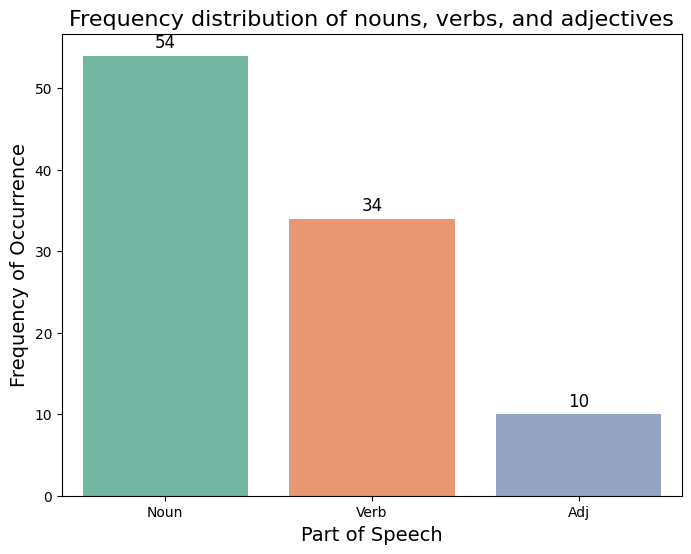

In [25]:
# 統計頻率
noun_count = len(nouns)
verb_count = len(verbs)
adj_count = len(adjs)

# 繪製條形圖
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Noun', 'Verb', 'Adj'], y=[noun_count, verb_count, adj_count], palette="Set2")

# 在每個柱子上加數字
for i, v in enumerate([noun_count, verb_count, adj_count]):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# 標題和標籤
plt.title("Frequency distribution of nouns, verbs, and adjectives", fontsize=16)
plt.xlabel("Part of Speech", fontsize=14)
plt.ylabel("Frequency of Occurrence", fontsize=14)

# 顯示圖形
plt.show()

# 說明與反思：
* 製作過程很順利，stanza的功能很強大，尤其是詞性標註（POS Tagging），很符合我的作業目標，能夠標出每個詞的詞性（名詞、動詞、形容詞）。
* 這個程式非常實際，能快速篩選小故事中的【名詞、動詞、形容詞】。
* 我也做了數量統計和圖表，將資料視覺化。
* 我想若我的目標群使用這個程式，應該可以很快速得到詞類分析的答案。
* 不確定這樣有沒有符合作業要求，因為老師在課中的範本是用chatgpt找ner套件，所以我就在範例中選擇功能強大的stanza來解決我設置的問題。
* 如果沒有達到作業要求或缺少步驟，歡迎助教來信通知！我願意調整作業重做或改進。